## Import all packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from urllib.request import urlretrieve

## Download dataset

In [3]:
link = "https://raw.githubusercontent.com/sernome/segmentation/master/Customer%20Segmentation%20-%20Mall%20Dataset/mall_dataset.csv"
dataset_name = "mall_dataset.csv"

def fetch_data():
    new_folder = "Customer Segmentation - Mall Dataset"
    download_path = os.path.join(os.getcwd(),new_folder)
    os.mkdir(download_path)
    os.chdir(download_path)
    urlretrieve(link, dataset_name)
    if dataset_name in os.listdir():
        print("Dataset successfully downloaded!")
    else:
        print("Dataset NOT successfully downloaded. Please doublecheck.")

fetch_data()

Dataset successfully downloaded!


## Create Pandas dataframe

In [25]:
mall = pd.read_csv(dataset_name)
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
mall.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## Initial exploratory data analysis

In [27]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
mall.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
mall[mall.duplicated(subset=None)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [30]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa65b98b0>,
      dtype=object)

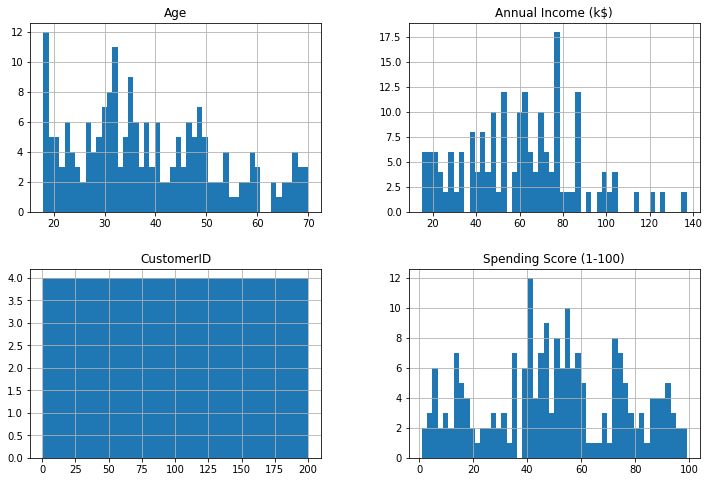

In [31]:
mall.hist(bins=50,figsize=(12,8))

In [32]:
mall.rename(columns={'CustomerID':'customerid','Genre':'gender','Age':'age','Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score'},inplace=True)

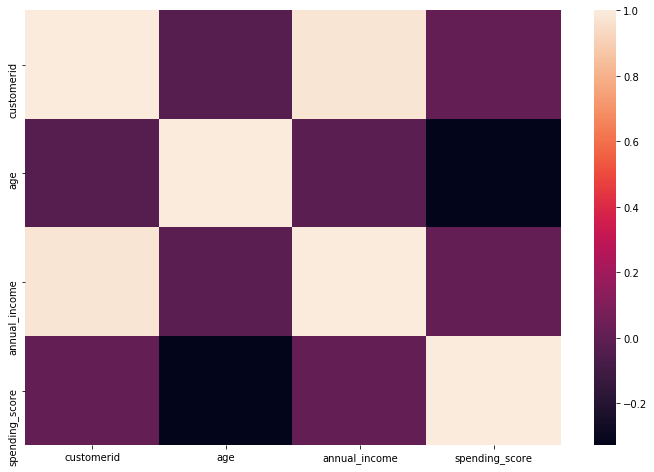

In [33]:
mall_corr = mall.corr()
plt.figure(figsize=(12,8))
sns.heatmap(mall_corr)

## Create Train and Test sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_set, test_set = train_test_split(mall, test_size=0.2, random_state=42)

In [36]:
mall = train_set.copy()

## Data pipeline creation

In [37]:
mall_d = pd.get_dummies(mall, columns=['gender'], drop_first=False)

In [38]:
mall_d['gender_Male'] = mall_d.gender_Male.astype('category')
mall_d['gender_Female'] = mall_d.gender_Male.astype('category')

In [39]:
mall_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 6 columns):
customerid        160 non-null int64
age               160 non-null int64
annual_income     160 non-null int64
spending_score    160 non-null int64
gender_Female     160 non-null category
gender_Male       160 non-null category
dtypes: category(2), int64(4)
memory usage: 6.8 KB


In [40]:
mall_dx = mall_d.iloc[:,1:]
mall_dx.columns

Index(['age', 'annual_income', 'spending_score', 'gender_Female',
       'gender_Male'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
mall_rd = sc.fit_transform(mall_dx)
mall_rd[:10]

array([[ 0.73027906, -0.24190423, -0.37113766, -0.87077078, -0.87077078],
       [-0.50042667,  2.39455436,  0.84383985,  1.14840785,  1.14840785],
       [-0.21084885, -0.8644014 , -0.97862642, -0.87077078, -0.87077078],
       [ 1.09225134, -1.19395872, -1.43424298, -0.87077078, -0.87077078],
       [ 0.07872897,  0.30735798,  0.23635109, -0.87077078, -0.87077078],
       [-0.2832433 ,  2.17484948,  1.03368009, -0.87077078, -0.87077078],
       [-1.15197676, -1.15734124,  1.33742446, -0.87077078, -0.87077078],
       [-0.2832433 , -1.37704612,  1.75507298, -0.87077078, -0.87077078],
       [-0.50042667,  0.56368034,  1.33742446, -0.87077078, -0.87077078],
       [ 1.16464579, -0.13205179,  0.23635109, -0.87077078, -0.87077078]])

## Training and evaluation with KNN Clustering

In [43]:
X = mall_rd.copy()

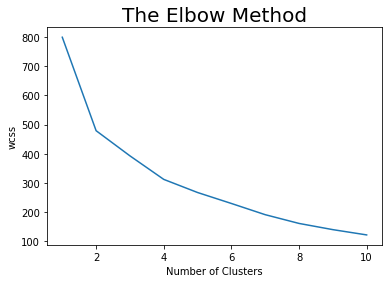

In [45]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [46]:
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'yellowbrick'